In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model,model_selection
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#model_selection is used for splitting data into training and test sets.

#US-PUMPKINS DATASET

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv')
pumpkins=data
data.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [ ]:
data.isnull().sum() #check for null values

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [ ]:
cols=['Package','Low Price','High Price','Date'] #iloc is pos base loc is label based
data=data.loc[:,cols]

In [ ]:
price = (data['Low Price'] + data['High Price']) / 2

In [ ]:
month = pd.DatetimeIndex(data['Date']).month

In [ ]:
new_data=pd.DataFrame({'Month': month, 'Package': data['Package'], 'Low Price': data['Low Price'],'High Price': data['High Price'], 'Price': price})

In [ ]:
print(new_data)

      Month        Package  Low Price  High Price   Price
0         4   24 inch bins     270.00      280.00  275.00
1         5   24 inch bins     270.00      280.00  275.00
2         9   24 inch bins     160.00      160.00  160.00
3         9   24 inch bins     160.00      160.00  160.00
4        11   24 inch bins      90.00      100.00   95.00
...     ...            ...        ...         ...     ...
1752      9  22 lb cartons      14.75       14.75   14.75
1753      9   36 inch bins     275.00      275.00  275.00
1754      9   36 inch bins     275.00      275.00  275.00
1755      9   36 inch bins     275.00      275.00  275.00
1756      9   36 inch bins     275.00      275.00  275.00

[1757 rows x 5 columns]


We can see that package has different units so we select units containing bushel

In [ ]:
new_data= new_data[new_data['Package'].str.contains('bushel',case=True,regex=True)]

In [ ]:
print(new_data)

      Month               Package  Low Price  High Price   Price
70        9  1 1/9 bushel cartons      15.00        15.0  15.000
71        9  1 1/9 bushel cartons      18.00        18.0  18.000
72       10  1 1/9 bushel cartons      18.00        18.0  18.000
73       10  1 1/9 bushel cartons      17.00        17.0  17.000
74       10  1 1/9 bushel cartons      15.00        15.0  15.000
...     ...                   ...        ...         ...     ...
1738      9    1/2 bushel cartons      15.00        15.0  15.000
1739      9    1/2 bushel cartons      13.75        15.0  14.375
1740      9    1/2 bushel cartons      10.75        15.0  12.875
1741      9    1/2 bushel cartons      12.00        12.0  12.000
1742      9    1/2 bushel cartons      12.00        12.0  12.000

[415 rows x 5 columns]


We see there are 1/2,1/9 bushels so we must normalise the price to show it per bushel

In [ ]:
new_data.loc[new_data['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_data.loc[new_data['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [ ]:
import matplotlib.pyplot as plt

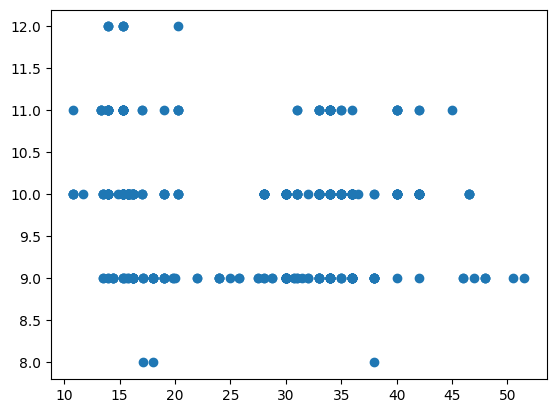

In [ ]:
price = new_data.Price
month = new_data.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

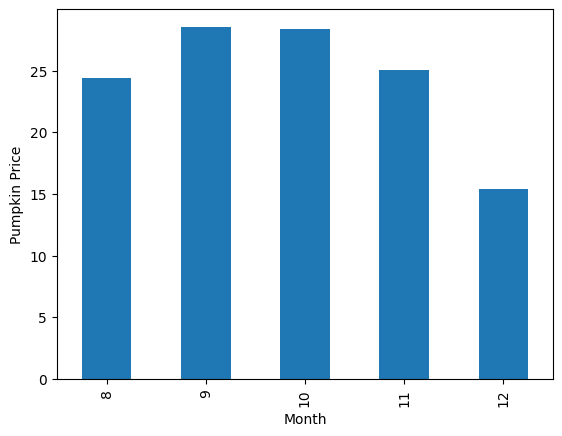

In [ ]:
new_data.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

#LOGISTIC REGRESSION





There are other types of logistic regression, including multinomial and ordinal:

Multinomial, which involves having more than one category - "Orange, White, and Striped".
Ordinal, which involves ordered categories, useful if we wanted to order our outcomes logically, like our pumpkins that are ordered by a finite number of sizes (mini,sm,med,lg,xl,xxl).


In [ ]:
columns_to_select = ['City Name','Package','Variety', 'Origin','Item Size', 'Color']
pumpkins1 = pumpkins.loc[:, columns_to_select]
print(pumpkins1)

      City Name        Package      Variety    Origin Item Size   Color
0     BALTIMORE   24 inch bins          NaN  MARYLAND       lge     NaN
1     BALTIMORE   24 inch bins          NaN  MARYLAND       lge     NaN
2     BALTIMORE   24 inch bins  HOWDEN TYPE  DELAWARE       med  ORANGE
3     BALTIMORE   24 inch bins  HOWDEN TYPE  VIRGINIA       med  ORANGE
4     BALTIMORE   24 inch bins  HOWDEN TYPE  MARYLAND       lge  ORANGE
...         ...            ...          ...       ...       ...     ...
1752  ST. LOUIS  22 lb cartons    MINIATURE  ILLINOIS       NaN   WHITE
1753  ST. LOUIS   36 inch bins    MINIATURE  MICHIGAN       sml     NaN
1754  ST. LOUIS   36 inch bins    MINIATURE  MICHIGAN       sml     NaN
1755  ST. LOUIS   36 inch bins    MINIATURE  MICHIGAN       sml     NaN
1756  ST. LOUIS   36 inch bins    MINIATURE  MICHIGAN       sml     NaN

[1757 rows x 6 columns]


In [ ]:
pumpkins1.dropna(inplace=True) #dataframe with naN emtries is dropped

In [ ]:
pumpkins1.info

<bound method DataFrame.info of       City Name       Package            Variety    Origin Item Size   Color
2     BALTIMORE  24 inch bins        HOWDEN TYPE  DELAWARE       med  ORANGE
3     BALTIMORE  24 inch bins        HOWDEN TYPE  VIRGINIA       med  ORANGE
4     BALTIMORE  24 inch bins        HOWDEN TYPE  MARYLAND       lge  ORANGE
5     BALTIMORE  24 inch bins        HOWDEN TYPE  MARYLAND       lge  ORANGE
6     BALTIMORE  36 inch bins        HOWDEN TYPE  MARYLAND       med  ORANGE
...         ...           ...                ...       ...       ...     ...
1694  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1695  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1696  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1697  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1698  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE

[991 rows x 6 columns]>

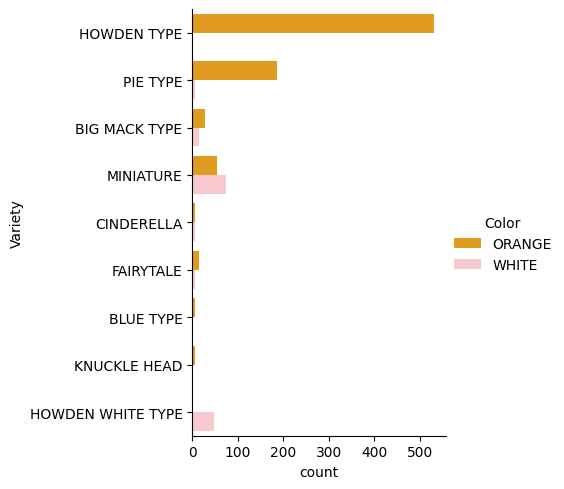

In [36]:
import seaborn as sns
# Colors to use for the different levels of the hue variable. 
# Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.
palette = {
'ORANGE': 'orange',
'WHITE': 'pink',
}

sns.catplot(
data=pumpkins1, y="Variety", hue="Color", kind="count",
palette=palette, 
)

Our pumpkins dataset contains string values for all its columns. Working with categorical data is intuitive for humans but not for machines. Machine learning algorithms work well with numbers. There's why encoding is a very important step in the data pre-processing phase, since it enables to turn categorical data into numerical data, without losing any information. A good encoding leads to build a good model.



For feature encoding there are two main types of encoders:

Ordinal encoder: it suits well for ordinal variables, which are categorical variables where their data follows a logical ordering, like the Item Size column in our dataset. It creates a mapping such that each category is represented by a number, which is the order of the category in the column.

#DATA PREPROCESSING


In [38]:
from sklearn.preprocessing import OrdinalEncoder

item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)
print(pumpkins1)

      City Name       Package            Variety    Origin Item Size   Color
2     BALTIMORE  24 inch bins        HOWDEN TYPE  DELAWARE       med  ORANGE
3     BALTIMORE  24 inch bins        HOWDEN TYPE  VIRGINIA       med  ORANGE
4     BALTIMORE  24 inch bins        HOWDEN TYPE  MARYLAND       lge  ORANGE
5     BALTIMORE  24 inch bins        HOWDEN TYPE  MARYLAND       lge  ORANGE
6     BALTIMORE  36 inch bins        HOWDEN TYPE  MARYLAND       med  ORANGE
...         ...           ...                ...       ...       ...     ...
1694  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1695  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1696  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1697  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1698  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE

[991 rows x 6 columns]


Categorical encoder: it suits well for nominal variables, which are categorical variables where their data does not follow a logical ordering, like all the features different from Item Size in our dataset. It is a one-hot encoding, which means that each category is represented by a binary column: the encoded variable is equal to 1 if the pumpkin belongs to that Variety and 0 otherwise.

In [39]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

Then, ColumnTransformer is used to combine multiple encoders into a single step and apply them to the appropriate columns.

In [43]:
from sklearn.compose import ColumnTransformer
    
ct = ColumnTransformer(transformers=[
        ('ord', ordinal_encoder, ordinal_features),
        ('cat', categorical_encoder, categorical_features)
        ])
    
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins1)

In [45]:
print(encoded_features)

      ord__Item Size  cat__City Name_ATLANTA  cat__City Name_BALTIMORE  \
2                1.0                     0.0                       1.0   
3                1.0                     0.0                       1.0   
4                3.0                     0.0                       1.0   
5                3.0                     0.0                       1.0   
6                1.0                     0.0                       1.0   
...              ...                     ...                       ...   
1694             4.0                     0.0                       0.0   
1695             4.0                     0.0                       0.0   
1696             4.0                     0.0                       0.0   
1697             4.0                     0.0                       0.0   
1698             4.0                     0.0                       0.0   

      cat__City Name_BOSTON  cat__City Name_CHICAGO  cat__City Name_COLUMBIA  \
2                       0.0    

On the other hand, to encode the label, we use the scikit-learn LabelEncoder class, which is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1 (here, 0 and 1).

In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins1['Color'])

Once we have encoded the features and the label, we can merge them into a new dataframe encoded_pumpkins

In [47]:
encoded_pumpkins = encoded_features.assign(Color=encoded_label)

In [48]:
print(encoded_pumpkins)

      ord__Item Size  cat__City Name_ATLANTA  cat__City Name_BALTIMORE  \
2                1.0                     0.0                       1.0   
3                1.0                     0.0                       1.0   
4                3.0                     0.0                       1.0   
5                3.0                     0.0                       1.0   
6                1.0                     0.0                       1.0   
...              ...                     ...                       ...   
1694             4.0                     0.0                       0.0   
1695             4.0                     0.0                       0.0   
1696             4.0                     0.0                       0.0   
1697             4.0                     0.0                       0.0   
1698             4.0                     0.0                       0.0   

      cat__City Name_BOSTON  cat__City Name_CHICAGO  cat__City Name_COLUMBIA  \
2                       0.0    

In [50]:
from sklearn.model_selection import train_test_split

X = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])]
y = encoded_pumpkins['Color']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
from sklearn.metrics import f1_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
F1-score:  0.7457627118644068


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 11,  22]])

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9246231155778895